In [1]:
import numpy as np

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def twsvm(X, y, C):
    y1 = np.where(y == 1)[0]
    y2 = np.where(y == -1)[0]

    X1, X2 = X[y1], X[y2]

    c1 = X1.shape[0]
    c2 = X2.shape[0]

    e1 = np.ones((c1, 1))
    e2 = np.ones((c2, 1))

    H1 = np.dot(X1, X2.T)
    H2 = np.dot(X2, X1.T)

    A1 = np.vstack((H1, np.eye(c1, c2)))
    A2 = np.vstack((H2, np.eye(c2, c1)))

    Q1 = np.dot(A1, A1.T) + C * np.eye(A1.shape[0])
    Q2 = np.dot(A2, A2.T) + C * np.eye(A2.shape[0])

    alpha1 = np.linalg.lstsq(Q1, np.vstack((e1, np.zeros((c2, 1)))), rcond=None)[0]
    alpha2 = np.linalg.lstsq(Q2, np.vstack((e2, np.zeros((c1, 1)))), rcond=None)[0]

    w1 = np.dot((alpha1[:c1] - alpha2[:c2]).T, X1 - X2)
    b1 = np.mean(e1 - np.dot(H1, alpha2[:c2]))

    w2 = np.dot((alpha2[:c2] - alpha1[:c1]).T, X2 - X1)
    b2 = np.mean(e2 - np.dot(H2, alpha1[:c1]))

    return w1, b1, w2, b2

def twsvm_predict(X, w1, b1, w2, b2):
    proj1 = np.dot(X, w1.T) + b1
    proj2 = np.dot(X, w2.T) + b2
    return np.sign(proj2 - proj1)  

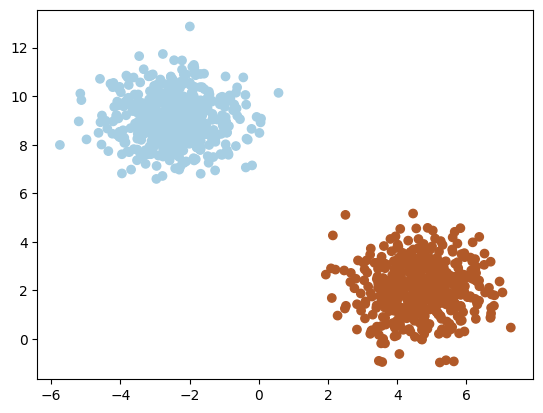

In [2]:
# generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
y[y == 0] = -1

# visualize data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [3]:
# train model
w1, b1, w2, b2 = twsvm(X, y, 1)

print(w1, b1, w2, b2)

[[  16.85704177 -177.58416674]] 0.9999939506233364 [[  16.85704177 -177.58416674]] 0.9999939506233909


In [4]:
def plot_decision_boundary(X, y, w1, b1, w2, b2):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = twsvm_predict(np.c_[xx.ravel(), yy.ravel()], w1, b1, w2, b2)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

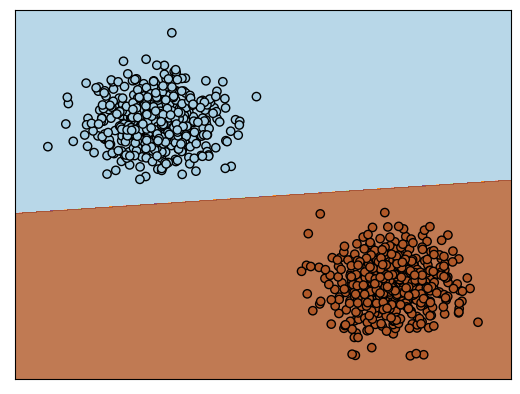

In [5]:
# visualize data with decision boundary
plot_decision_boundary(X, y, w1, b1, w2, b2)